# Bring in libraries that are neeeded for Covid Data and Visualization

In [1]:
import urllib.request, json 
import matplotlib.pyplot as plt
import pandas as pd

# Get data from  European Centre for Disease Prevention and Control

In [2]:
# Link for the European Center for Disease Prevention and Control to download current dataset.
url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/json/"

#Retrieve the data for the dataset
with urllib.request.urlopen(url) as url:
    data2 = json.loads(url.read().decode())

# Put dataset into a pandas dataframe to make it easeir to work with
# Dictionaries needed to be flattened to put into a dataframe
data = pd.DataFrame.from_dict(pd.json_normalize(data2['records']))

# View the data from the dataset

In [3]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,06/06/2020,6,6,2020,915,9,Afghanistan,AF,AFG,37172386,Asia
1,05/06/2020,5,6,2020,787,6,Afghanistan,AF,AFG,37172386,Asia
2,04/06/2020,4,6,2020,758,24,Afghanistan,AF,AFG,37172386,Asia
3,03/06/2020,3,6,2020,759,5,Afghanistan,AF,AFG,37172386,Asia
4,02/06/2020,2,6,2020,545,8,Afghanistan,AF,AFG,37172386,Asia


# Get the top number of countries to visualize

In [4]:
topCountries = 10
typeOfChart = 'log'

In [5]:
if topCountries == 10:
    fSize = 15
elif topCountries == 20:
    fSize = 10
else:
    fSize =10

In [6]:
#All Date data needed
rawData = data
date = data.dateRep
data.index = date
maxDate = date[0]
x = len(date)

In [7]:
#rename columns to make it easier to use
data.drop(data.columns[[0,1,2,3,7,8,9]],axis=1,inplace=True)

data.rename(columns={'dateRep':'date', 'countriesAndTerritories':'country',
                     'countryterritoryCode':'countryCode'},inplace=True)
data['country'] = data['country'].str.replace("_"," ")
data['cases'] = data['cases'].astype(int)
data['deaths'] = data['deaths'].astype(int)
data.sort_index(axis=0)

,cases,deaths,country,continentExp
dateRep,,,,
01/01/2020,0,0,Iceland,Europe
01/01/2020,0,0,Iran,Asia
01/01/2020,0,0,Sweden,Europe
01/01/2020,0,0,Nepal,Asia
01/01/2020,0,0,Mexico,America
...,...,...,...,...
31/12/2019,0,0,Belgium,Europe
31/12/2019,0,0,Ecuador,America
31/12/2019,0,0,Russia,Europe


In [8]:
#get the contries and get the values of cases and deaths
total = data.groupby(['country']).sum()
data2 = total.sort_values("cases",ascending=False)
#get the top countries and then get the list of countries
data3 = data2.head(topCountries)
countries = list(data3.index)

In [9]:
#create dataframe to put data into
timelineCases = pd.DataFrame(index=range(0),columns=range(x))
columnTitles = list(range(1,x + 1))
timelineCases.columns = columnTitles

In [10]:
j=0
for i in countries:
    country = countries[j]
    currentCountry = data[data.country == country]
    a = pd.DataFrame(currentCountry['cases']).transpose()
    a = a.iloc[:, ::-1]
    a.index = [country]
    zero_cols = [col for col, is_zero in ((a==0).sum() == a.shape[0]).items() if is_zero]
    a.drop(zero_cols,axis=1, inplace=True)
    bDays = list(range(1,(a.size)+1))
    a.columns = bDays
    timelineCases = pd.concat([timelineCases,a])
    j = j+1

In [11]:
timelineCases = timelineCases.transpose()
timelineCases = timelineCases.apply(lambda x: x + x.cumsum())

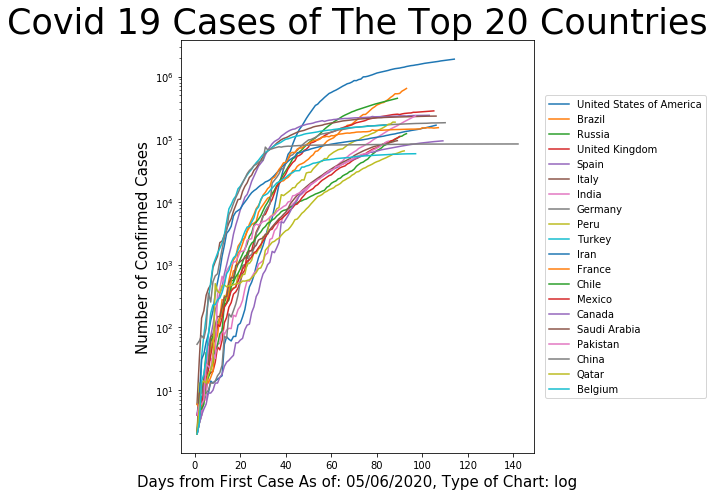

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_ylabel('Number of Confirmed Cases', fontsize = 15)
ax.set_xlabel('Days from First Case As of: '+ (str(maxDate)[0:10]) +', Type of Chart: ' + typeOfChart, fontsize = 15)
ax.set_title('Covid 19 Cases of The Top '+ str(topCountries) + ' Countries', fontsize=35)
plt.plot(timelineCases, label = "All Cases of Covid 19")
if topCountries <= 10:
    ax.legend(labels = countries, loc='lower right',fontsize =fSize)
elif topCountries >10:
    ax.legend(labels = countries, loc='right',fontsize=fSize,bbox_to_anchor = (1.50, 0.5))
ax.set_yscale(typeOfChart)
fig.tight_layout()
plt.show()

In [13]:
timelineDeaths = pd.DataFrame(index=range(0),columns=range(x))
columnTitles = list(range(1,x + 1))
timelineDeaths.columns = columnTitles

In [14]:
j=0
for i in countries:
    country = countries[j]
    currentCountry = data[data.country == country]
    b = pd.DataFrame(currentCountry['deaths']).transpose()
    b = b.iloc[:, ::-1]
    b.index = [country]
    zero_cols = [col for col, is_zero in ((b==0).sum() == b.shape[0]).items() if is_zero]
    b.drop(zero_cols,axis=1, inplace=True)
    bDays = list(range(1,(b.size)+1))
    b.columns = bDays
    timelineDeaths = pd.concat([timelineDeaths,b])
    j = j+1

In [15]:
timelineDeaths = timelineDeaths.transpose()
timelineDeaths = timelineDeaths.apply(lambda x: x + x.cumsum())

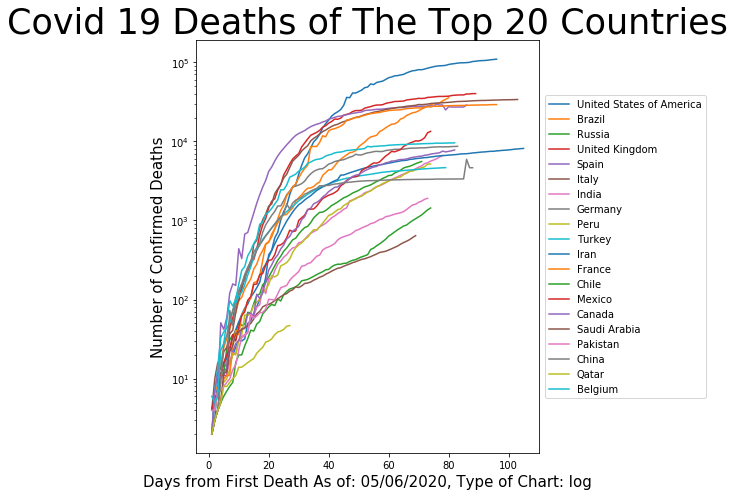

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_ylabel('Number of Confirmed Deaths', fontsize = 15)
ax.set_xlabel('Days from First Death As of: '+ (str(maxDate)[0:10]) +', Type of Chart: ' + typeOfChart, fontsize = 15)
ax.set_title('Covid 19 Deaths of The Top '+ str(topCountries) + ' Countries', fontsize=35)
plt.plot(timelineDeaths, label = "All Deaths of Covid 19")
if topCountries <= 10:
    ax.legend(labels = countries, loc='lower right',fontsize =fSize)
elif topCountries >10:
    ax.legend(labels = countries, loc='right',fontsize=fSize,bbox_to_anchor = (1.50, 0.5))
ax.set_yscale(typeOfChart)
fig.tight_layout()
plt.show()